# Section 4 Model Evaluation

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Data

X_train = pd.read_csv('Data/Splitting/Generic/X_train.csv')
y_train_fso = pd.read_csv('Data/Splitting/Generic/y_train_FSO.csv')
y_train_rf = pd.read_csv('Data/Splitting/Generic/y_train_RF.csv')

X_val = pd.read_csv('Data/Splitting/Generic/X_val.csv')
y_val_fso = pd.read_csv('Data/Splitting/Generic/y_val_FSO.csv')
y_val_rf = pd.read_csv('Data/Splitting/Generic/y_val_RF.csv')

# Combine training and validation feature sets
X_new_train = pd.concat([X_train, X_val], axis=0, ignore_index=True)

# Combine training and validation target sets for FSO and RF
y_new_train_fso = pd.concat([y_train_fso, y_val_fso], axis=0, ignore_index=True)
y_new_train_rf = pd.concat([y_train_rf, y_val_rf], axis=0, ignore_index=True)


X_test = pd.read_csv('Data/Splitting/Generic/X_test.csv')
y_test_fso = pd.read_csv('Data/Splitting/Generic/y_test_FSO.csv')
y_test_rf = pd.read_csv('Data/Splitting/Generic/y_test_RF.csv')

In [3]:
def evaluate_random_forest(model_path, X_train, y_train, X_test, y_test, model_name="Random Forest", label="FSO"):
    """
    Function to evaluate a Random Forest model with the given training and test data.
    
    Parameters:
        model_path (str): Path to the saved model metadata.
        X_train (pd.DataFrame): Combined training dataset features.
        y_train (pd.Series or pd.DataFrame): Combined training dataset target.
        X_test (pd.DataFrame): Test dataset features.
        y_test (pd.Series or pd.DataFrame): Test dataset target.
        model_name (str): Name of the model being evaluated (default: "Random Forest").
        label (str): Label for the target variable (e.g., "FSO" or "RF").
    
    Returns:
        None
    """
    # Load the saved metadata
    saved_model = joblib.load(model_path)

    # Extract the best parameters
    best_params = saved_model['Best Params']

    # Reconstruct the Random Forest model with the best parameters
    rf_model = RandomForestRegressor(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        random_state=42  # Ensure reproducibility
    )

    # Train the reconstructed model on the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    

    print(f"{model_name} - {label}:")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test R²: {r2:.4f}")
    
    y_test = y_test.squeeze()
    y_pred = y_pred.squeeze()
    y_test = pd.to_numeric(y_test, errors='coerce')
    y_pred = pd.to_numeric(y_pred, errors='coerce')

    # Plot predictions vs. actual values
    plt.figure(figsize=(10, 6))
    plt.style.use('seaborn-v0_8-paper')
    
    plt.scatter(y_test, y_pred, alpha=0.6, label=f'{model_name} (RMSE: {rmse:.2f}, R²: {r2:.2f})')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit', linewidth=2)
    plt.xlabel(f"Actual Attenuation (dB)", fontsize=24)
    plt.ylabel(f"Predicted Attenuation  (dB)", fontsize=24)
    plt.xticks(fontsize=18) 
    plt.yticks(fontsize=18)         
    plt.legend(fontsize=22)
    plt.grid(True)

    plt.savefig(f'Figure/eps/Evaluation/Final_{label}_{model_name}_randomforest.eps', format='eps')
    plt.show()

/Users/ruyuliu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Random Forest - FSO:
Test RMSE: 0.8245
Test R²: 0.9559


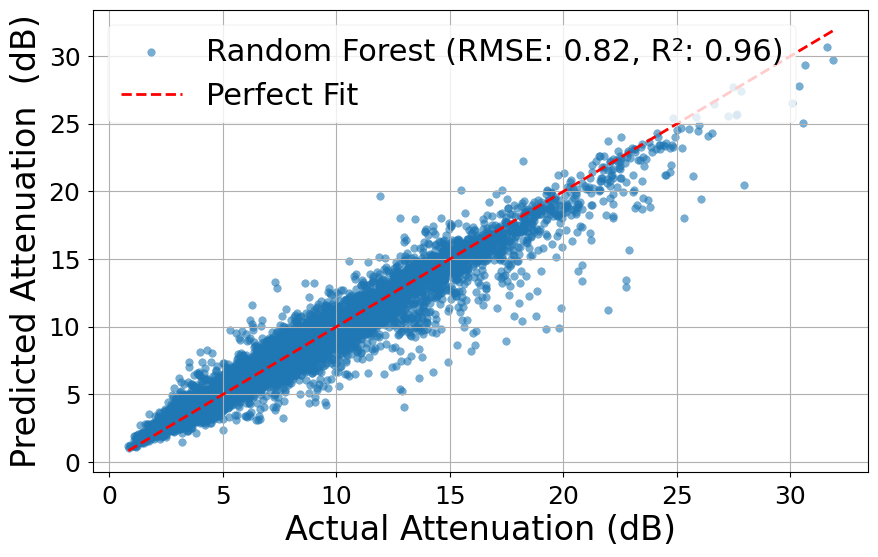

In [4]:
# Evaluate FSO model
evaluate_random_forest(
    model_path="saved_models/generic_fso_best_model.pkl",
    X_train=X_new_train,
    y_train=y_new_train_fso,
    X_test=X_test,
    y_test=y_test_fso,
    model_name="Random Forest",
    label="FSO"
)

/Users/ruyuliu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Random Forest - RF:
Test RMSE: 0.4910
Test R²: 0.9798


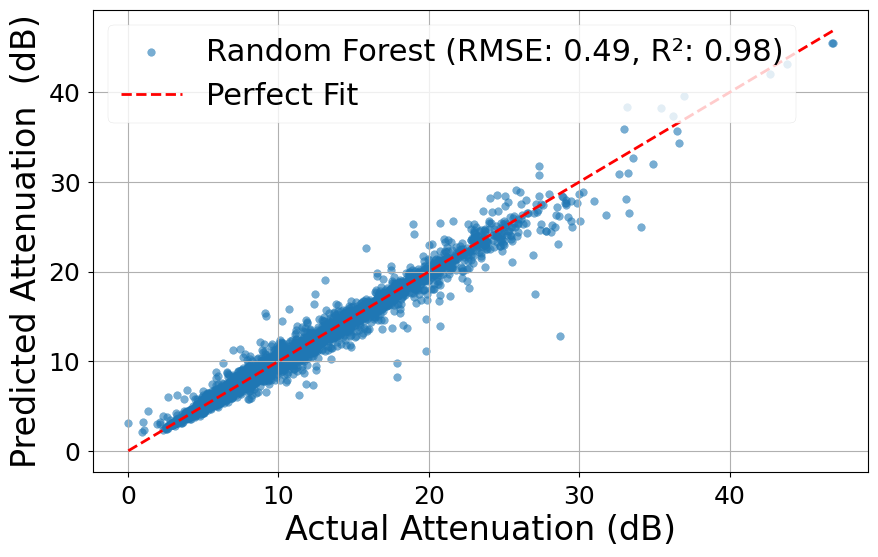

In [5]:
# Evaluate RF model
evaluate_random_forest(
    model_path="saved_models/generic_rf_best_model.pkl",
    X_train=X_new_train,
    y_train=y_new_train_rf,
    X_test=X_test,
    y_test=y_test_rf,
    model_name="Random Forest",
    label="RF"
)